In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import f1_score

In [2]:
#Set viewing options
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth', None)

In [3]:
trainlabel = pd.read_csv('train_10pct_labels.csv')

In [4]:
train = pd.read_csv('train_10pct.csv')

In [5]:
trainlabel.shape

(26059, 2)

In [6]:
train.shape

(26059, 39)

In [7]:
train.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [8]:
train.isna().sum()


building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [9]:
train['has_superstructure_adobe_mud'].unique()

array([1, 0], dtype=int64)

In [10]:
#EDA count_floors_pre_eq                       0
# age                                       0
# area_percentage                           0
# height_percentage                         0
# land_surface_condition                    0
# foundation_type                           0
# roof_type                                 0
# ground_floor_type                         0
# other_floor_type                          0
# position                                  0
# plan_configuration


In [12]:
trainlabel['damage_grade'].value_counts(normalize=True)

2    0.567405
3    0.336122
1    0.096473
Name: damage_grade, dtype: float64

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26059 entries, 0 to 26058
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   building_id                             26059 non-null  int64 
 1   geo_level_1_id                          26059 non-null  int64 
 2   geo_level_2_id                          26059 non-null  int64 
 3   geo_level_3_id                          26059 non-null  int64 
 4   count_floors_pre_eq                     26059 non-null  int64 
 5   age                                     26059 non-null  int64 
 6   area_percentage                         26059 non-null  int64 
 7   height_percentage                       26059 non-null  int64 
 8   land_surface_condition                  26059 non-null  object
 9   foundation_type                         26059 non-null  object
 10  roof_type                               26059 non-null  object
 11  gr

In [14]:
train.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

In [16]:
##https://intellipaat.com/community/1161/label-encoding-across-multiple-columns-in-scikit-learn
le = LabelEncoder()
train_enc = train.apply(le.fit_transform)
train_enc

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,19838,6,435,7525,1,6,5,3,2,2,0,0,1,3,2,1,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
1,678,8,802,1716,1,2,7,5,1,2,0,3,1,2,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
2,2319,21,322,5535,1,2,4,3,2,2,0,0,3,3,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
3,14549,22,370,6597,1,2,5,3,2,2,0,0,3,2,2,0,1,0,0,0,0,1,1,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
4,5001,11,115,928,2,6,7,7,2,2,0,0,3,2,2,1,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26054,11229,20,169,1422,0,3,4,2,2,2,0,0,0,2,2,0,1,0,0,0,0,1,1,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
26055,347,20,1047,894,1,2,7,3,2,2,1,3,1,2,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
26056,5972,10,1268,7344,2,13,5,5,2,2,0,0,1,2,2,1,1,1,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
26057,24218,17,208,6169,2,5,7,5,2,2,1,0,1,3,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0


In [17]:
train_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26059 entries, 0 to 26058
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   building_id                             26059 non-null  int64
 1   geo_level_1_id                          26059 non-null  int64
 2   geo_level_2_id                          26059 non-null  int64
 3   geo_level_3_id                          26059 non-null  int64
 4   count_floors_pre_eq                     26059 non-null  int64
 5   age                                     26059 non-null  int64
 6   area_percentage                         26059 non-null  int64
 7   height_percentage                       26059 non-null  int64
 8   land_surface_condition                  26059 non-null  int32
 9   foundation_type                         26059 non-null  int32
 10  roof_type                               26059 non-null  int32
 11  ground_floor_ty

In [18]:
train_enc.columns


Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

<AxesSubplot:xlabel='count_floors_pre_eq', ylabel='count'>

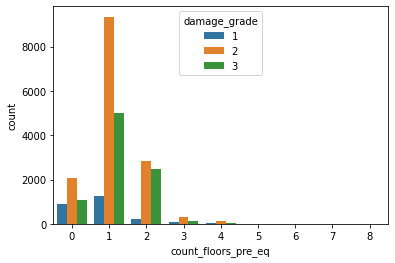

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
#plt.bar(train_enc['count_floors_pre_eq'], trainlabel['damage_grade'])
sns.countplot(x=train_enc['count_floors_pre_eq'], hue=trainlabel['damage_grade'])

<AxesSubplot:xlabel='roof_type', ylabel='count'>

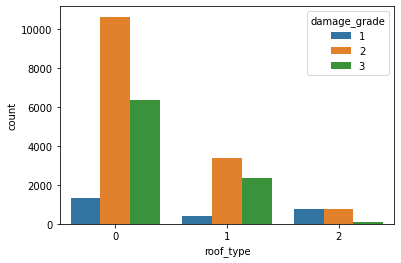

In [32]:
sns.countplot(x=train_enc['roof_type'], hue=trainlabel['damage_grade']) # roof type 2 pretty hearty

<AxesSubplot:xlabel='legal_ownership_status', ylabel='count'>

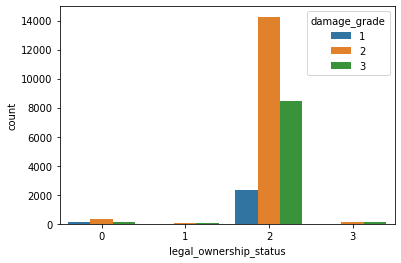

In [36]:
sns.countplot(x=train_enc['legal_ownership_status'], hue=trainlabel['damage_grade'])

In [39]:
train['dmg'] = trainlabel['damage_grade']
train.head()


,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,dmg
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3


In [58]:
table = train['geo_level_1_id'].groupby(train['geo_level_1_id'])
table
train.pivot_table(
    index=['dmg'], columns='geo_level_1_id', values='count',
    fill_value=0, aggfunc=np.sum())

TypeError: _sum_dispatcher() missing 1 required positional argument: 'a'

In [ ]:
train_enc.to_csv('train_10pct_encoded')